In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

import string


[nltk_data] Downloading package punkt to /Users/danatok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:

no_pages = 7


headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
#a-section a-spacing-medium
#    r = requests.get('https://www.amazon.nl/s?k=automatic+feeder&language=en&crid=3C66TWN033GOV&qid=1615231201&sprefix=automatic+feeder%2Caps%2C148&ref='+str(pageNo), headers=headers)#, proxies=proxies)
r = requests.get('https://www.amazon.nl/-/en/dp/B087HH623N/ref=sr_1_1?crid=3C66TWN033GOV&dchild=1&keywords=automatische+voerbak&qid=1615301719&sprefix=automatic+feeder%2Caps%2C148&sr=8-1',headers=headers)#, proxies=proxies)
content = r.content

soup = BeautifulSoup(content)

alls = []
for d in soup.findAll('div', attrs={'id':'cm-cr-global-review-list'}):
    print(d)
    

    name = d.find('div', attrs={'class':'a-section review aok-relative cr-desktop-review-page-0'})
    #rating = d.find('span', attrs={'class':'a-icon-alt'})
    print(name)
    #review_titles = d.find('data-hook', attrs ='review-title','class': 'a-size-base review-title a-color-base review-title-content a-text-bold'})
    #print(review_titles.text)
    #review_title = soup.findAll('a', {'data-hook':'review-collapsed','class':'a-expander-content reviewText review-text-content a-expander-partial-collapse-content'})

    all3 = []
    if name is not None:
            #print(n[0]['alt'])
        all3.append(name.text)
    else:
        all3.append("unknown-product")

    alls.append(all3)  
    
   

<div class="a-section global-review-views review-views celwidget" data-hook="global-customer-reviews-widget" id="cm-cr-global-review-list">
<div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="R15VHR1E3KC1NO"><div class="a-row a-spacing-none" id="R15VHR1E3KC1NO-review-card"><div class="a-section celwidget" id="customer_review_foreign-R15VHR1E3KC1NO"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><spa

In [6]:
alls

[['Laura Harvey5.0 out of 5 stars\nGood product and supportive customer services\nReviewed in the United Kingdom on 21 February 2021Verified Purchase\n\n  The product is perfect. Easy to use and clean, works very well. Our cat responds very well to the voice recording too. I experienced power supply difficulties which was initally thought to be a faulty unit. When power was restored it caused the unit to dispense several portions of food. This turned out to be a faulty plug and no fault in the unit. The supplier was very supportive in trying to resolve the issue and was in daily contact, they offered a refund or replacement until I rectified the problem with the plug.\n\nRead more\n\nReport abuse\n']]

In [6]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
#a-section a-spacing-medium
#    r = requests.get('https://www.amazon.nl/s?k=automatic+feeder&language=en&crid=3C66TWN033GOV&qid=1615231201&sprefix=automatic+feeder%2Caps%2C148&ref='+str(pageNo), headers=headers)#, proxies=proxies)
r = requests.get('https://www.amazon.nl/-/en/dp/B087HH623N/ref=sr_1_1?crid=3C66TWN033GOV&dchild=1&keywords=automatische+voerbak&qid=1615301719&sprefix=automatic+feeder%2Caps%2C148&sr=8-1',headers=headers)#, proxies=proxies)
content = r.content

soup = BeautifulSoup(content)

review_titles = soup.findAll('div', attrs = {'id': 'cm-cr-global-review-list'})
                             #{'data-hook':'review-collapsed','class': 'a-expander-content reviewText review-text-content a-expander-partial-collapse-content'})
review_titles

[<div class="a-section global-review-views review-views celwidget" data-hook="global-customer-reviews-widget" id="cm-cr-global-review-list">
 <div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="R15VHR1E3KC1NO"><div class="a-row a-spacing-none" id="R15VHR1E3KC1NO-review-card"><div class="a-section celwidget" id="customer_review_foreign-R15VHR1E3KC1NO"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><s

In [ ]:
<div class="a-section global-review-views review-views celwidget" data-hook="global-customer-reviews-widget" id="cm-cr-global-review-list">
<div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="R15VHR1E3KC1NO"><div class="a-row a-spacing-none" id="R15VHR1E3KC1NO-review-card"><div class="a-section celwidget" id="customer_review_foreign-R15VHR1E3KC1NO"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Laura Harvey</span></div></div></div><div class="a-row a-spacing-none"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="cmps-review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span><span class="a-size-base review-title a-color-base review-title-content a-text-bold" data-hook="review-title">
<span>Good product and supportive customer services</span>
</span></div><span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Kingdom on 21 February 2021</span><div class="a-row a-spacing-mini review-data review-format-strip"><span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge-linkless">Verified Purchase</span></div><div class="a-row a-spacing-small review-data"><span class="a-size-base review-text" data-hook="review-body"><div aria-live="polite" class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>
  The product is perfect. Easy to use and clean, works very well. Our cat responds very well to the voice recording too. I experienced power supply difficulties which was initally thought to be a faulty unit. When power was restored it caused the unit to dispense several portions of food. This turned out to be a faulty plug and no fault in the unit. The supplier was very supportive in trying to resolve the issue and was in daily contact, they offered a refund or replacement until I rectified the problem with the plug.
</span>
</div><div class="a-expander-header a-expander-partial-collapse-header"><div class="a-expander-content-fade"></div><a aria-label="Toggle full review text" class="a-declarative" data-a-expander-toggle='{"allowLinkDefault":true, "expand_prompt":"Read more", "collapse_prompt":"Read less"}' data-action="a-expander-toggle" data-hook="expand-collapse-read-more-less" href="javascript:void(0)"><i class="a-icon a-icon-extender-expand"></i><span class="a-expander-prompt">Read more</span></a></div></div></span></div><div class="a-row review-comments cr-vote-action-bar" data-hook="review-comments"><span class="cr-vote" data-hook="review-voting-widget">
</span><span class="cr-footer-line-height">
<span><span class="a-declarative" data-action="cr-popup" data-cr-popup='{"width":"580","title":"ReportAbuse","url":"/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=guOGUlmA6RKYLBWLUZwalMihIaaw1CnG1CQyvswAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R15VHR1E3KC1NO&amp;sessionId=260-4586519-2702311","height":"380"}'><a class="a-size-base a-link-normal a-color-secondary report-abuse-link a-text-normal" href="/-/en/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=guOGUlmA6RKYLBWLUZwalMihIaaw1CnG1CQyvswAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R15VHR1E3KC1NO&amp;sessionId=260-4586519-2702311">Report abuse</a></span></span></span>
</div></div></div></div><div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="RLL4MGBXI6XW0"><div class="a-row a-spacing-none" id="RLL4MGBXI6XW0-review-card"><div class="a-section celwidget" id="customer_review_foreign-RLL4MGBXI6XW0"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Martha H.</span></div></div></div><div class="a-row a-spacing-none"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="cmps-review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span><span class="a-size-base review-title a-color-base review-title-content a-text-bold" data-hook="review-title">
<span>So far so good</span>
</span></div><span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Kingdom on 6 March 2021</span><div class="a-row a-spacing-mini review-data review-format-strip"><span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge-linkless">Verified Purchase</span></div><div class="a-row a-spacing-small review-data"><span class="a-size-base review-text" data-hook="review-body"><div aria-live="polite" class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>
  So far so good, it works well, good portions, easy to clean and will sort your daily feeding problem out.
</span>
</div><div class="a-expander-header a-expander-partial-collapse-header"><div class="a-expander-content-fade"></div><a aria-label="Toggle full review text" class="a-declarative" data-a-expander-toggle='{"allowLinkDefault":true, "expand_prompt":"Read more", "collapse_prompt":"Read less"}' data-action="a-expander-toggle" data-hook="expand-collapse-read-more-less" href="javascript:void(0)"><i class="a-icon a-icon-extender-expand"></i><span class="a-expander-prompt">Read more</span></a></div></div></span></div><div class="a-row review-comments cr-vote-action-bar" data-hook="review-comments"><span class="cr-vote" data-hook="review-voting-widget">
</span><span class="cr-footer-line-height">
<span><span class="a-declarative" data-action="cr-popup" data-cr-popup='{"width":"580","title":"ReportAbuse","url":"/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=guu81vrvccnwQ8G7vtKwLvMEte%2BJTQ0oNbMfJBcAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=RLL4MGBXI6XW0&amp;sessionId=260-4586519-2702311","height":"380"}'><a class="a-size-base a-link-normal a-color-secondary report-abuse-link a-text-normal" href="/-/en/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=guu81vrvccnwQ8G7vtKwLvMEte%2BJTQ0oNbMfJBcAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=RLL4MGBXI6XW0&amp;sessionId=260-4586519-2702311">Report abuse</a></span></span></span>
</div></div></div></div><div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="R2B4DEP9AFEBIL"><span class="cr-translated-review-content">
<span class="cr-single-review-loading aok-hidden">
<span class="reviews-loading"></span>
</span>
</span>
<div class="a-row a-spacing-none" id="R2B4DEP9AFEBIL-review-card"><div class="a-section celwidget" id="customer_review_foreign-R2B4DEP9AFEBIL"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Alessandro</span></div></div></div><div class="a-row a-spacing-none"><i class="a-icon a-icon-star a-star-1 review-rating" data-hook="cmps-review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i><span class="a-letter-space"></span><span class="a-size-base review-title a-color-base review-title-content a-text-bold" data-hook="review-title">
<span class="cr-original-review-content">Ha funzionato per qualche mese poi....NON ADATTO PER CANI E GATTI MA SOLO PER RODITORI...</span><span class="cr-translated-review-content aok-hidden"></span>
</span></div><span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in Italy on 18 October 2020</span><div class="a-row a-spacing-mini review-data review-format-strip"><span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge-linkless">Verified Purchase</span></div><div class="a-row a-spacing-small review-data"><span class="a-size-base review-text" data-hook="review-body"><div aria-live="polite" class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span class="cr-original-review-content">
  All'inizio sembrava funzionare regolarmente, poi dopo 2 mesi ha iniziato a non erogare piu' le crocchette anche se il meccanismo dentro gira regolarmente...il problema nasce dal fatto che il distributore viene indicato per somministare cibo a cani e gatti ma poi effettivamente nel video esplicativo che viene indicato sulla pagina il distributore e' impiegato per somministrare cibo a roditori, cio' sta a significare che il tio di cibo che puo' somministrare deve essere assolutamente secco (quindi il micro pallets per i roditori) e non le comuni crocchette che utilizziamo per cani e gatti che mantengono al loro interno un minimo dose di umidita' che con il passare dei mesi va ad impastare il meccanismo e non lo fa piu' fnzionare...NON ADATTO PER CANI E GATTI...
</span><span class="cr-translated-review-content aok-hidden"></span>
</div><div class="a-expander-header a-expander-partial-collapse-header"><div class="a-expander-content-fade"></div><a aria-label="Toggle full review text" class="a-declarative" data-a-expander-toggle='{"allowLinkDefault":true, "expand_prompt":"Read more", "collapse_prompt":"Read less"}' data-action="a-expander-toggle" data-hook="expand-collapse-read-more-less" href="javascript:void(0)"><i class="a-icon a-icon-extender-expand"></i><span class="a-expander-prompt">Read more</span></a></div></div></span></div><div class="a-row review-comments cr-vote-action-bar" data-hook="review-comments"><span class="cr-vote" data-hook="review-voting-widget">
<div class="a-row a-spacing-small"><span class="a-size-base a-color-tertiary cr-vote-text" data-hook="helpful-vote-statement">3 people found this helpful</span></div></span><span class="cr-footer-line-height">
<span><span class="a-declarative" data-action="cr-popup" data-cr-popup='{"width":"580","title":"ReportAbuse","url":"/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=ghrL0wAE9Z5vVOCZob%2BYQ3RLn0HHMxSA2Oh1WWoAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R2B4DEP9AFEBIL&amp;sessionId=260-4586519-2702311","height":"380"}'><a class="a-size-base a-link-normal a-color-secondary report-abuse-link a-text-normal" href="/-/en/hz/reviews-render/report-abuse?voteDomain=Reviews&amp;ref=cm_cr_dp_d_freport&amp;csrfT=ghrL0wAE9Z5vVOCZob%2BYQ3RLn0HHMxSA2Oh1WWoAAAABAAAAAGBHzj9yYXcAAAAA%2B4kUEk%2F7iMGR3xPcX6iU&amp;entityId=R2B4DEP9AFEBIL&amp;sessionId=260-4586519-2702311">Report abuse</a></span></span></span>
<div class="a-section a-spacing-none a-spacing-top-small cr-translate-this-review-section"><span class="a-declarative" data-action="reviews:ajax-post" data-reviews:ajax-post='{"indicatorSelector":"#R2B4DEP9AFEBIL .cr-single-review-loading","params":{"isSingleReview":"true","reviews":"[{\"id\":\"R2B4DEP9AFEBIL\",\"version\":0,\"locale\":{\"language\":\"it\",\"country\":\"IT\"},\"marketplaceId\":\"APJ6JRA9NG5V4\"}]","csrf":"gkWWmdw1hIf/PA2+PowPTuKF99IcLUghtSlM0coAAAABAAAAAGBHzj9yYXcAAAAA+4kUEk/7iMGR3xPcX6iU","selectorPrefix":".cr-widget-FocalReviews"},"url":"/hz/reviews-render/ajax/reviews/augment/ref=cm_cr_dp_d_trn_s_grs"}'><a class="a-size-base a-link-normal" data-hook="cr-translate-this-review-link" href="#customerReviews">Translate review to English</a></span></div></div></div></div></div><div class="a-section review aok-relative cr-desktop-review-page-0" data-hook="review" id="R3UG0WRUKGY784"><span class="cr-translated-review-content">
<span class="cr-single-review-loading aok-hidden">
<span class="reviews-loading"></span>
</span>
</span>
<div class="a-row a-spacing-none" id="R3UG0WRUKGY784-review-card"><div class="a-section celwidget" id="customer_review_foreign-R3UG0WRUKGY784"><div class="a-row a-spacing-mini" data-hook="genome-widget"><div class="a-profile" data-a-size="small"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Alessandro</span></div></div></div><div class="a-row a-spacing-none"><i class="a-icon a-icon-star a-star-5 review-rating" data-hook="cmps-review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i><span class="a-letter-space"></span><span class="a-size-base review-title a-color-base review-title-content a-text-bold" data-hook="review-title">
<span class="cr-original-review-content">Comodissimo!</span><span class="cr-translated-review-content aok-hidden"></span>
</span></div><span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in Italy on 1 December 2020</span><div class="a-row a-spacing-mini review-data review-format-strip"><span class="a-size-mini a-color-state a-text-bold" data-hook="avp-badge-linkless">Verified Purchase</span></div><div class="a-row a-spacing-small review-data"><span class="a-size-base review-text" data-hook="review-body"><div aria-live="polite" class="a-expander-collapsed-height a-row a-expander-container a-expander-partial-collapse-container" data-a-expander-collapsed-height="300" data-a-expander-name="review_text_read_more" style="max-height:300px"><div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span class="cr-original-review-content">
  Cercavo un distributore di crocchette per due motivi: poter stare via di casa per una notte senza dover tornare qualcuno che passasse ad occuparsi del gatto e perché il mio gatto ha preso l'abitudine di mangiare alle 5 (quando la mia ragazza è di turno) e di conseguenza ci tira giù dal letto ogni giorno a quell'ora.<br/><br/>Ho provato due diversi distributori e

In [41]:

no_pages = 7

def get_data(pageNo):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    #a-section a-spacing-medium
    #r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    r = requests.get('https://www.amazon.nl/s?k=automatic+feeder&language=en&crid=3C66TWN033GOV&qid=1615231201&sprefix=automatic+feeder%2Caps%2C148&ref='+str(pageNo), headers=headers)#, proxies=proxies)
    
    content = r.content
    soup = BeautifulSoup(content)
    
    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-medium'}):
        print(d)
        name = d.find('span', attrs={'a-size-base-plus a-color-base a-text-normal'})
        #n = name.text
        #print(n[0]['alt'])
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-base'})
                 #d.find('a', attrs={'class':'a-size-base'})
        price = d.find('span', attrs={'class':'a-price-whole'})
        
        all3 = []
        if name is not None:
            #print(n[0]['alt'])
            all3.append(name.text)
        else:
            all3.append("unknown-product")

        

        if rating is not None:
            #print(rating.text)
            all3.append(rating.text)
        else:
            all3.append('-1')

        if users_rated is not None:
            #print(price.text)
            all3.append(users_rated.text)
        else:
            all3.append('0')     

        if price is not None:
            #print(price.text)
            all3.append(price.text)
        else:
            all3.append('0')
        alls.append(all3)    
    return(alls)

In [42]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))

<div class="a-section a-spacing-medium">
<div class="a-section a-spacing-micro s-grid-status-badge-container">
</div>
<span class="rush-component" data-component-type="s-product-image">
<a class="a-link-normal s-no-outline" href="/-/en/dp/B084Q7PY3Z/ref=sr_1_1?crid=3C66TWN033GOV&amp;dchild=1&amp;keywords=automatische+voerbak&amp;qid=1615297471&amp;sprefix=automatic+feeder%2Caps%2C148&amp;sr=8-1">
<div class="a-section aok-relative s-image-square-aspect">
<img alt="Navaris Automatic feeding bowl with timer - 1.6 L feeder up to 4 meals per day - acoustic notification - for small dogs cat" class="s-image" data-image-index="1" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg" srcset="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg 1x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL480_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL640_QL65_.j

<div class="a-section a-spacing-medium">
<div class="a-section a-spacing-micro s-grid-status-badge-container">
</div>
<span class="rush-component" data-component-type="s-product-image">
<a class="a-link-normal s-no-outline" href="/-/en/dp/B07R5MJ4FS/ref=sr_1_1?crid=3C66TWN033GOV&amp;dchild=1&amp;keywords=automatische+voerbak&amp;qid=1615297472&amp;sprefix=automatic+feeder%2Caps%2C148&amp;sr=8-1">
<div class="a-section aok-relative s-image-square-aspect">
<img alt="PUPPY KITTY Automatic Feeder for Cat and Dog, 7L Feeder Cat with Timer Feed, LCD Programmable Screen, Dual Power Supply an..." class="s-image" data-image-index="1" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/61pzF1xG37L._AC_UL320_.jpg" srcset="https://m.media-amazon.com/images/I/61pzF1xG37L._AC_UL320_.jpg 1x, https://m.media-amazon.com/images/I/61pzF1xG37L._AC_UL480_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/61pzF1xG37L._AC_UL640_QL65_

<div class="a-section a-spacing-medium">
<div class="a-section a-spacing-micro s-grid-status-badge-container">
</div>
<span class="rush-component" data-component-type="s-product-image">
<a class="a-link-normal s-no-outline" href="/-/en/dp/B084Q7PY3Z/ref=sr_1_1?crid=3C66TWN033GOV&amp;dchild=1&amp;keywords=automatische+voerbak&amp;qid=1615297473&amp;sprefix=automatic+feeder%2Caps%2C148&amp;sr=8-1">
<div class="a-section aok-relative s-image-square-aspect">
<img alt="Navaris Automatic feeding bowl with timer - 1.6 L feeder up to 4 meals per day - acoustic notification - for small dogs cat" class="s-image" data-image-index="1" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg" srcset="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg 1x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL480_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL640_QL65_.j

<div class="a-section a-spacing-medium">
<div class="a-section a-spacing-micro s-grid-status-badge-container">
</div>
<span class="rush-component" data-component-type="s-product-image">
<a class="a-link-normal s-no-outline" href="/-/en/dp/B084Q7PY3Z/ref=sr_1_1?crid=3C66TWN033GOV&amp;dchild=1&amp;keywords=automatische+voerbak&amp;qid=1615297474&amp;sprefix=automatic+feeder%2Caps%2C148&amp;sr=8-1">
<div class="a-section aok-relative s-image-square-aspect">
<img alt="Navaris Automatic feeding bowl with timer - 1.6 L feeder up to 4 meals per day - acoustic notification - for small dogs cat" class="s-image" data-image-index="1" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg" srcset="https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL320_.jpg 1x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL480_QL65_.jpg 1.5x, https://m.media-amazon.com/images/I/61ZEcJ7VQnL._AC_UL640_QL65_.j

In [43]:
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Name','Rating','No_Users_Rated', 'Price'])
#df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [44]:
df = df.drop_duplicates(subset=['Name'], keep='first')

In [45]:
df = df.reset_index(drop = True)

In [46]:
df

,Name,Rating,No_Users_Rated,Price
0,Navaris Automatic feeding bowl with timer - 1....,3.9 out of 5 stars,38,47.99
1,"Automatic feeding tray, robust large capacity ...",2.0 out of 5 stars,1,36.49
2,"Automatic Vehicle, Dog Water Dispenser, Automa...",-1,0,30.59
3,Automatic Pet Feeder Dog Feeder for Cats with ...,-1,0,279.11
4,"Automatic feeding bowl for cats and dogs, pet ...",-1,0,174.21
...,...,...,...,...
62,"Feeding Tray, Large Pet Feeder Cats Automatic ...",-1,0,11.19
63,"Automatische voerautomaat voor huisdieren, dri...",-1,0,67.99
64,Heating Feeder Automatic Large Capacity Food G...,-1,0,81.35
65,Automatic pet feeding bowl Dog Cat Feeder with...,-1,0,275.43


In [47]:
df['New_rating'] = df['Rating'].str[:3]

In [48]:
#df['New_rating'] = df['New_rating'].str.extract('(\d+)')

In [49]:

df.sort_values(['New_rating','Price'], ascending=[False,True])

,Name,Rating,No_Users_Rated,Price,New_rating
47,"PUPPY KITTY Automatic Feeder for Cat and Dog, ...",4.6 out of 5 stars,"2,249",62.99,4.6
5,Navaris Automatic feeding bowl with drinking s...,4.4 out of 5 stars,202,39.99,4.4
0,Navaris Automatic feeding bowl with timer - 1....,3.9 out of 5 stars,38,47.99,3.9
1,"Automatic feeding tray, robust large capacity ...",2.0 out of 5 stars,1,36.49,2.0
10,"Double feeding bowl automatic drinking tray, d...",-1,0,0,-1
...,...,...,...,...,...
64,Heating Feeder Automatic Large Capacity Food G...,-1,0,81.35,-1
56,Cat Feeding Bowl Dog Automatic Water Double Fe...,-1,0,82.59,-1
35,"Automatische voerbak voor huisdieren, voedseld...",-1,0,86.72,-1
58,Cat tray Automatic drinking Cat supplies Feede...,-1,0,9.50,-1


In [76]:
df = df[df['No_Users_Rated'] != '(€1.30/Fl Oz)']
df = df[df['No_Users_Rated'] != '(€1.23/Fl Oz)']
# Fix it

In [80]:
df = df['No_Users_Rated'].replace(',','.')

In [81]:
df['No_Users_Rated'] = df['No_Users_Rated'].astype(float)
df['Price'] = df['Price'].astype(float)
df['New_rating'] = df['New_rating'].astype(float)

KeyError: 'No_Users_Rated'

In [50]:
# Topic Modelling
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df['Name'])

In [52]:
# matrix factorization
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=20,random_state=42)
nmf_model.fit(dtm)

NMF(n_components=20, random_state=42)

In [53]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['set', 'supplies', 'voor', 'rabbit', 'automatic', 'water', 'black', 'feeding', 'non', 'fountains', 'ceramic', 'chickens', 'slip', 'drinking', 'bowl']


THE TOP 15 WORDS FOR TOPIC #1
['drinker', 'antislipvoet', 'blauw', 'drinkfontein', 'kat', 'hond', 'huisdieren', 'met', 'en', 'waterdispenser', 'automatische', 'honden', 'katten', 'voerbak', 'voor']


THE TOP 15 WORDS FOR TOPIC #2
['slip', 'set', 'timing', 'wifi', 'removable', 'smart', 'camera', 'pink', 'dispenser', 'pet', 'automatic', 'bowl', 'dogs', 'feeding', 'cats']


THE TOP 15 WORDS FOR TOPIC #3
['large', 'cat', 'durable', 'bowls', 'fountain', 'automatic', 'dogs', 'dispensers', 'birds', '8l', 'box', 'gray', 'dog', 'dispenser', 'water']


THE TOP 15 WORDS FOR TOPIC #4
['bowls', 'feeder', '4l', 'button', 'lcd', 'recording', 'voice', 'day', 'pet', 'screen', 'timing', 'dispensers', 'times', 'version', 'dog']


THE TOP 15 WORDS FOR TOPIC #5
['chickens', '2l', 'large', 'birds', 'anti', 'house', 'animal', 'c

In [28]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32915 sha256=2f391f2092958f5d4227e23efaedafec63c18b0aaf514d993993a0f5870f12ba
  Stored in directory: /Users/danatok/Library/Caches/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [62]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
words = ['dogs', 'cats', 'for', 'and']
stop_words = stop_words+ words

In [63]:
corpus = df['Name']

lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

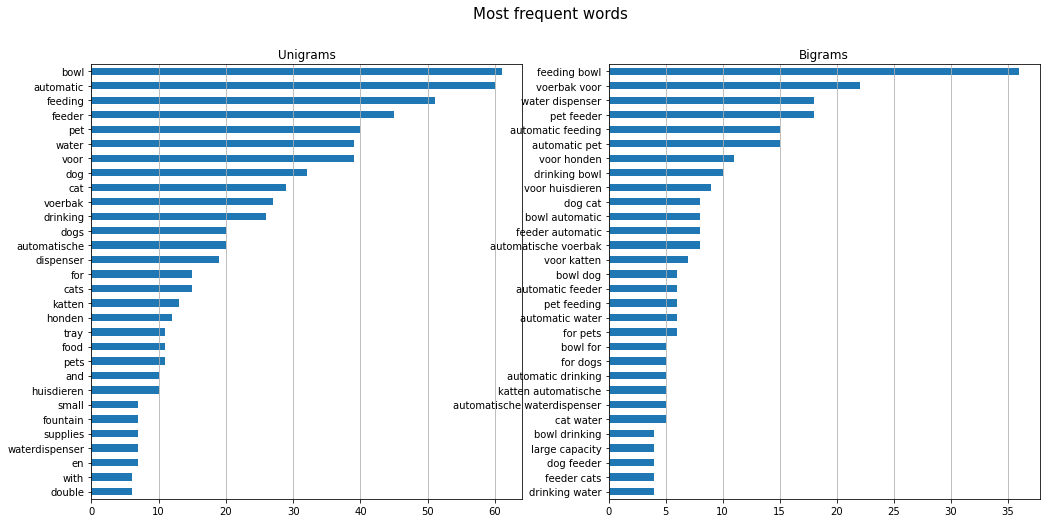

In [64]:
lst_tokens = [word.lower() for word in lst_tokens if word not in 
                    stop_words]
lst_tokens = re.sub(r'[^\w\s]', '', str(lst_tokens).strip())
lst_tokens = lst_tokens.split()
fig, ax = plt.subplots(figsize=(17, 8), nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()